In [37]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import cov
import seaborn as sns
import random
diamonddf = pd.read_csv('diamonds.csv')


In [38]:
diamonddf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
diamonddf.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [40]:
diamonddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [41]:
diamonddf = diamonddf.drop('Unnamed: 0', 1)
df = diamonddf.sample(frac = 0.01)
df = df[df['price'] <= 10000]

<AxesSubplot:title={'center':'Diamond Carat VS Diamond Price'}, xlabel='price', ylabel='carat'>

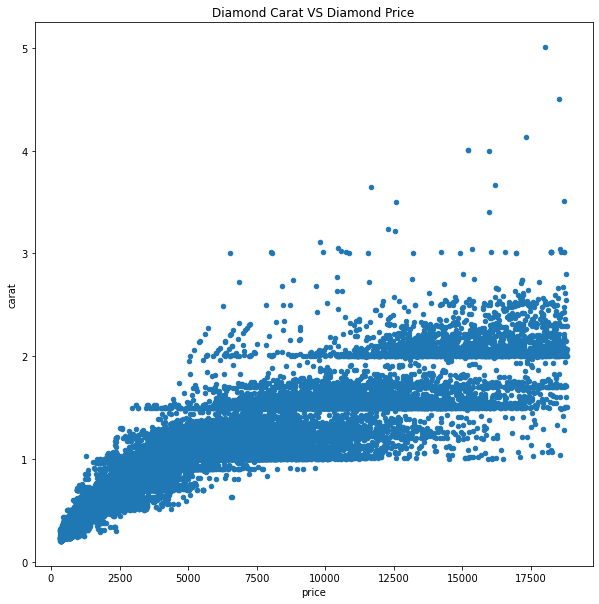

In [42]:
diamonddf.plot.scatter('price', 'carat', figsize =(10,10), title = "Diamond Carat VS Diamond Price")

In [96]:
def price_nonum_characteristic(column, sample_size, max_price):
    df = diamonddf.sample(frac = sample_size)
    df = df[df['price'] <= max_price]
    df2 = df.groupby(column).mean()
    df2.plot.bar(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()

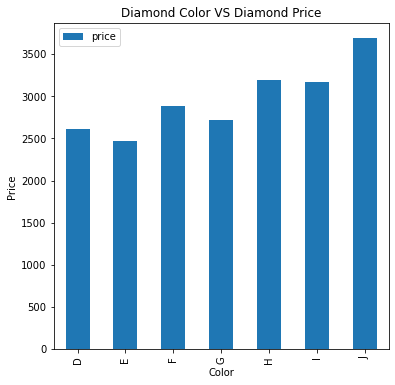

In [132]:
price_nonum_characteristic('color', 0.01, 10000)

In [133]:
def price_num_characteristic(column, sample_size, max_price):
    df = diamonddf.sample(frac = sample_size)
    df = df[df['price'] <= max_price]
    df2 = df.groupby(column).mean()
    df2.plot(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()


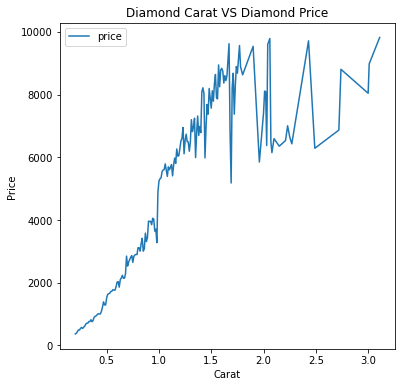

In [134]:
price_num_characteristic('carat', 0.25, 10000)

In [108]:
class Graph:
    def __init__(self, column, sample_size, max_price):
        self.column = column
        self.sample_size = sample_size
        self.max_price = max_price
        if type(column) == int:
            isNum = True 


    def price_nonum_characteristic(self):
        df = diamonddf.sample(frac = self.sample_size)
        df = df[df['price'] <= self.max_price]
        df2 = df.groupby(self.column).mean()
        df2.plot.bar(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(self.column.capitalize())), xlabel=self.column.capitalize(), ylabel='Price')
        return plt.show()

    def price_num_characteristic(self):
        df = diamonddf.sample(frac = self.sample_size)
        df = df[df['price'] <= self.max_price]
        df2 = df.groupby(self.column).mean()
        df2.plot(y = 'price', figsize = (6,6),title = ('Diamond {} VS Diamond Price'.format(self.column.capitalize())), xlabel = self.column.capitalize(), ylabel='Price')
        return plt.show()
    

In [109]:
Graph('carat', 0.002, 10000)

<AxesSubplot:xlabel='price', ylabel='depth'>

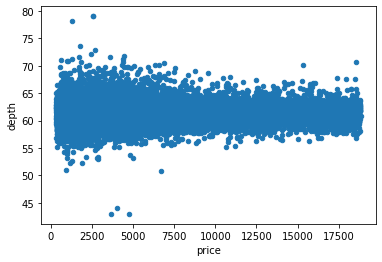

In [135]:
diamonddf.plot.scatter('price','depth')

True

SyntaxError: 'return' outside function (<ipython-input-52-6f095a6e6483>, line 3)